In [15]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt
df = pd.read_csv('co2.csv', encoding='latin1')

In [16]:
df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/kmï¿½
...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/kmï¿½
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/kmï¿½
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/kmï¿½
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/kmï¿½


In [17]:
df["Year"].dtype


dtype('int64')

In [18]:
df['co2 emition per person(tons)']=df['CO2 emission (Tons)']/df['Population(2022)']
df['co2 emition per person(tons)']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
59615    45.125172
59616    45.712263
59617    46.438609
59618    47.109487
59619    47.754769
Name: co2 emition per person(tons), Length: 59620, dtype: float64

In [19]:
df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),co2 emition per person(tons)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/kmï¿½,0.000000
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/kmï¿½,0.000000
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/kmï¿½,0.000000
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/kmï¿½,0.000000
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/kmï¿½,0.000000
...,...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/kmï¿½,45.125172
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/kmï¿½,45.712263
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/kmï¿½,46.438609
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/kmï¿½,47.109487


In [20]:
p = df[df['CO2 emission (Tons)'] != 0]

In [21]:
mini = p['co2 emition per person(tons)'].min()
mini

np.float64(6.229410917766049e-06)

In [22]:
df[df['co2 emition per person(tons)']==mini]['Country']

52654    Tajikistan
Name: Country, dtype: object

In [23]:
df2 = df.groupby('Year').agg({"co2 emition per person(tons)": "median"}).reset_index()
df3 = df[df['Country'] == 'India'].groupby('Year').agg({"co2 emition per person(tons)": "median"})
df2_filtered = df2[df2['Year'] > 1900]
df2_filtered

,Year,co2 emition per person(tons)
151,1901,0.000000
152,1902,0.000000
153,1903,0.000000
154,1904,0.000000
155,1905,0.000000
...,...,...
266,2016,86.441813
267,2017,90.774082
268,2018,94.946896
269,2019,98.985236


In [24]:
df2_filtered

,Year,co2 emition per person(tons)
151,1901,0.000000
152,1902,0.000000
153,1903,0.000000
154,1904,0.000000
155,1905,0.000000
...,...,...
266,2016,86.441813
267,2017,90.774082
268,2018,94.946896
269,2019,98.985236


INDIA vs WORLD

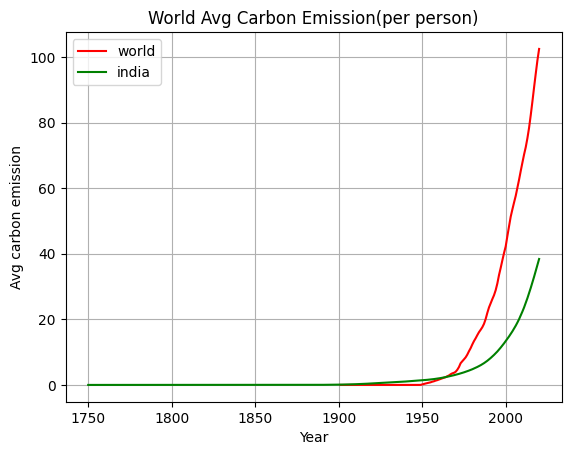

In [25]:
plt.plot(df2_filtered['Year'], df2_filtered['co2 emition per person(tons)'], label='world', color='r')
plt.plot(df3['co2 emition per person(tons)'].keys(), df3['co2 emition per person(tons)'].values,label= 'india',color='g')
plt.xlabel("Year")
plt.ylabel('Avg carbon emission')
plt.title('World Avg Carbon Emission(per person)')
plt.grid(True)
plt.legend()
plt.show()

world vs america vs russia

In [26]:
df2 = df.groupby('Year').agg({"co2 emition per person(tons)": "median"})
df4 = df[df['Country'] == 'Russia'].groupby('Year').agg({"co2 emition per person(tons)": "median"})
df5 = df[df['Country'] == 'United States'].groupby('Year').agg({"co2 emition per person(tons)": "median"})

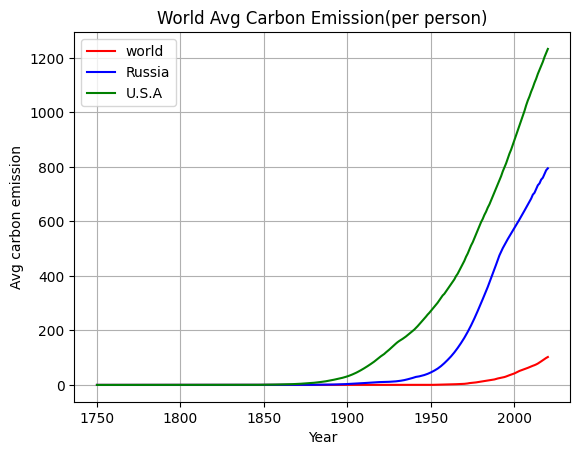

In [27]:
plt.plot(df2['co2 emition per person(tons)'].keys(), df2['co2 emition per person(tons)'].values,label= 'world', color='r')
plt.plot(df4['co2 emition per person(tons)'].keys(), df4['co2 emition per person(tons)'].values,label= 'Russia', color='b')
plt.plot(df5['co2 emition per person(tons)'].keys(), df5['co2 emition per person(tons)'].values,label= 'U.S.A', color='g')
plt.xlabel("Year")
plt.ylabel('Avg carbon emission')

plt.title('World Avg Carbon Emission(per person)')
plt.grid(True)
plt.legend()
plt.show()